In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import poisson
import pandas as pd
plt.style.use("ggplot")
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 13
np.set_printoptions(precision=4)


from ipywidgets import IntProgress
from IPython.display import display
from ipywidgets import IntSlider
from ipywidgets import interact, interactive, fixed, interact_manual

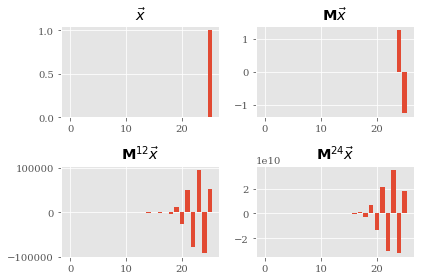

In [2]:
def pripravi_vektor(N0):
    dolzina = int(N0+1)
    vektor = np.zeros(dolzina)
    vektor[N0] = 1
    return vektor
def pripravi_matriko(N0, dt):
    beta, beta_s, beta_r = 1, 5, 4
    dolzina = int(N0+1)
    def R(n):       
        return beta_r * n * dt
    def S(n):
        return beta_s * n * dt
    matrika = np.zeros((dolzina, dolzina))
    for i in range(dolzina):
        try:
            matrika[i,i] = 1 - (R(i)+S(i))
        except IndexError:
            if i == N0:
                pass
            else:
                print(f"Pri i={i} ne morem nastavit diagonalnih")
        try:
            matrika[i+1,i] = R(i)
        except IndexError:            
            if i == N0:
                pass
            else:
                print(f"Pri i={i} ne morem nastavit Ri")
        try:
            matrika[i, i+1] = S(i+1)
        except IndexError:
            if i == N0:
                pass
            else:
                
                print(f"Pri i={i} ne morem nastavit Si+1")
    return matrika
M = pripravi_matriko(25,0.01)
x = pripravi_vektor(25)
plt.subplot(221)
plt.bar(np.arange(0,25+1,1), x)
plt.title(r"$\vec{x}$")
plt.subplot(222)
plt.bar(np.arange(0,25+1,1), M@x)
plt.title(r"$\mathbf{M}\vec{x}$")
plt.subplot(223)
plt.bar(np.arange(0,25+1,1), M@M@M@M@M@M@M@M@M@M@M@M@x)
plt.title(r"$\mathbf{M}^{12}\vec{x}$")
plt.subplot(224)
plt.bar(np.arange(0,25+1,1), M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@x)
plt.title(r"$\mathbf{M}^{24}\vec{x}$")
plt.tight_layout(h_pad=1.1)
plt.savefig("2-1-zgresena-prehodna3.pdf")
plt.show()


In [71]:
np.sum(np.dot(M, x))

0.8

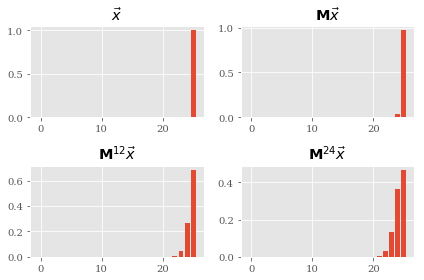

In [3]:
def pripravi_vektor(N0):
    dolzina = int(N0+1)
    vektor = np.zeros(dolzina)
    vektor[N0] = 1
    return vektor
def pripravi_matriko(N0, dt):
    beta, beta_s, beta_r = 1, 5/4, 0
    dolzina = int(N0+1)
    def R(n):       
        return beta_r * n * dt
    def S(n):
        return beta_s * n * dt
    matrika = np.zeros((dolzina, dolzina))
    for i in range(dolzina):
        try:
            matrika[i,i] = 1 - (R(i)+S(i))
        except IndexError:
            if i == N0:
                pass
            else:
                print(f"Pri i={i} ne morem nastavit diagonalnih")
        try:
            matrika[i+1,i] = R(i)
        except IndexError:
            
            if i == N0:
                pass
            else:
                raise IndexError(f"Pri i={i} ne morem nastavit Ri")
        try:
            matrika[i, i+1] = S(i+1)
        except IndexError:
            if i == N0:
                pass
            else:
                raise IndexError(f"Pri i={i} ne morem nastavit Si+1")
    return matrika
M = pripravi_matriko(25,0.001)
x = pripravi_vektor(25)
plt.subplot(221)
plt.bar(np.arange(0,25+1,1), x)
plt.title(r"$\vec{x}$")
plt.subplot(222)
plt.bar(np.arange(0,25+1,1), M@x)
plt.title(r"$\mathbf{M}\vec{x}$")
plt.subplot(223)
plt.bar(np.arange(0,25+1,1), M@M@M@M@M@M@M@M@M@M@M@M@x)
plt.title(r"$\mathbf{M}^{12}\vec{x}$")
plt.subplot(224)
plt.bar(np.arange(0,25+1,1), M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@M@x)
plt.title(r"$\mathbf{M}^{24}\vec{x}$")
plt.tight_layout(h_pad=1.1)
plt.savefig("2-1-zgresena-prehodna3.pdf")
plt.show()


dt=0.001
dt=0.0009
dt=0.0008
dt=0.0007000000000000001
dt=0.0006000000000000001
dt=0.0005
dt=0.0004000000000000001
dt=0.00030000000000000014
dt=0.0002000000000000001
dt=0.0001


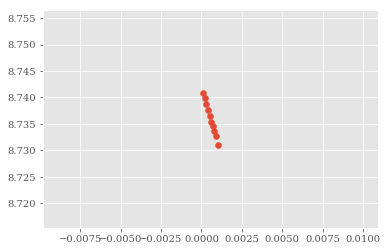

In [43]:
N0 = 250
def cas_izumrtja(dt):
    print(f"dt={dt}")
    i = 0
    x = pripravi_vektor(N0)
    M = pripravi_matriko(N0, dt)
    while True:
        i += 1
        x = M@x
        if np.allclose(np.sum(x[:2]), 1):
            break
    return i*dt
dtji = np.linspace(0.001, 1*10**(-4), 10)
casi_izumrtja = [cas_izumrtja(dt) for dt in dtji]
plt.scatter(dtji, casi_izumrtja)

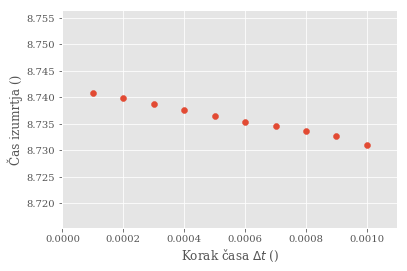

In [47]:
plt.scatter(dtji, casi_izumrtja)
plt.xlabel(r"Korak časa $\Delta t$ ()")
plt.ylabel("Čas izumrtja ()")
plt.xlim((0, 1.1e-3))
plt.savefig("2-2-casi-izumrtja.pdf")
plt.show()

Prej je mlelo 0:3:25, da vidimo, koliko bo zdaj:
Woow...6s!!! :DDD se splača pisat pametno kodo!

In [36]:
%%time
def povp_in_mi(dt):
    x = pripravi_vektor(250)
    M = pripravi_matriko(250, dt)
    MAKSCAJT = 9
    cajti = np.linspace(0, MAKSCAJT, 1000)
    povp = np.empty_like(cajti)
    mi = np.empty_like(cajti)
    indeksi = np.arange(0,250+1,1)
    prejsnji_cajt = 0
    x = pripravi_vektor(250)
    M = pripravi_matriko(250, dt)
    for i, cajt in enumerate(cajti):
        print(f"cajt = {cajt:0.3} od {MAKSCAJT:0}")
        interval_cajta = cajt-prejsnji_cajt
        for _ in range(int(interval_cajta/dt)):
            x = M@x
        povp[i] = np.sum(x*indeksi)
        mi[i] = np.sum(x*indeksi*indeksi)
        prejsnji_cajt=cajt
    return cajti, povp, mi
dt = 10**(-5)
cajt, povp, miji = povp_in_mi(dt)

cajt = 0.0 od 9
cajt = 0.00901 od 9
cajt = 0.018 od 9
cajt = 0.027 od 9
cajt = 0.036 od 9
cajt = 0.045 od 9
cajt = 0.0541 od 9
cajt = 0.0631 od 9
cajt = 0.0721 od 9
cajt = 0.0811 od 9
cajt = 0.0901 od 9
cajt = 0.0991 od 9
cajt = 0.108 od 9
cajt = 0.117 od 9
cajt = 0.126 od 9
cajt = 0.135 od 9
cajt = 0.144 od 9
cajt = 0.153 od 9
cajt = 0.162 od 9
cajt = 0.171 od 9
cajt = 0.18 od 9
cajt = 0.189 od 9
cajt = 0.198 od 9
cajt = 0.207 od 9
cajt = 0.216 od 9
cajt = 0.225 od 9
cajt = 0.234 od 9
cajt = 0.243 od 9
cajt = 0.252 od 9
cajt = 0.261 od 9
cajt = 0.27 od 9
cajt = 0.279 od 9
cajt = 0.288 od 9
cajt = 0.297 od 9
cajt = 0.306 od 9
cajt = 0.315 od 9
cajt = 0.324 od 9
cajt = 0.333 od 9
cajt = 0.342 od 9
cajt = 0.351 od 9
cajt = 0.36 od 9
cajt = 0.369 od 9
cajt = 0.378 od 9
cajt = 0.387 od 9
cajt = 0.396 od 9
cajt = 0.405 od 9
cajt = 0.414 od 9
cajt = 0.423 od 9
cajt = 0.432 od 9
cajt = 0.441 od 9
cajt = 0.45 od 9
cajt = 0.459 od 9
cajt = 0.468 od 9
cajt = 0.477 od 9
cajt = 0.486 od 9
cajt = 0

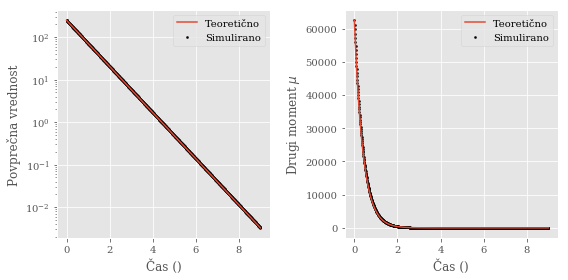

In [40]:

def mi1(t):
    return 250*np.exp(-5/4*t)
def mi2(t):
    return (250**2)*np.exp(2*(-5/4)*t)+\
    250 * np.exp(-5/4*t) * (np.exp(-5/4*t)-1)*(5/4)/(5/4)




plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(cajt, povp, label="Simulirano", s=4, c="k", zorder=1)
plt.plot(cajt, mi1(cajt), label="Teoretično")
plt.legend()
plt.xlabel("Čas ()")
plt.ylabel("Povprečna vrednost")
plt.semilogy()
plt.subplot(122)
plt.scatter(cajt, miji, label="Simulirano", s=4, c="k")
plt.plot(cajt, mi2(cajt), label="Teoretično")
plt.legend()
plt.xlabel("Čas ()")
plt.ylabel(r"Drugi moment $\mu$")
plt.tight_layout(h_pad=1.1)
#plt.semilogy()
#plt.savefig("2-2-povprecje-in-odmik-s-teoretsko-napovedjo-linearen.pdf")
plt.show()



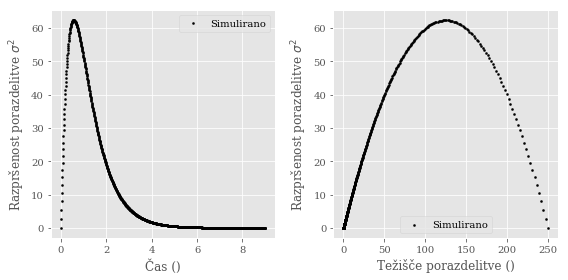

In [38]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.scatter(cajt, miji-(povp)**2, label="Simulirano", s=4, c="k")
plt.legend()
plt.xlabel("Čas ()")
plt.ylabel(r"Razpršenost porazdelitve $\sigma^2$")
plt.subplot(122)
plt.scatter(povp, miji-(povp)**2, label="Simulirano", s=4, c="k")
plt.legend()
plt.xlabel("Težišče porazdelitve ()")
plt.ylabel(r"Razpršenost porazdelitve $\sigma^2$")

plt.tight_layout(h_pad=1.1)
plt.savefig("2-3-razprsenost.pdf")

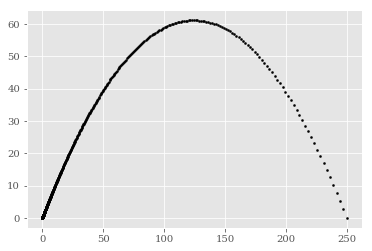

In [31]:
plt.scatter(povp, miji-(povp)**2, label="Simulirano", s=4, c="k")